OpenCV DNN 패키지를 이용하여 Faster R-CNN 기반의 Object Detection 수행

- 사전 학습된 모델 파일을 OpenCV로 로드하여 이미지와 영상에 대한 Object Detection 태스크 수행

### 입력 이미지

In [ ]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

image shape: (633, 806, 3)


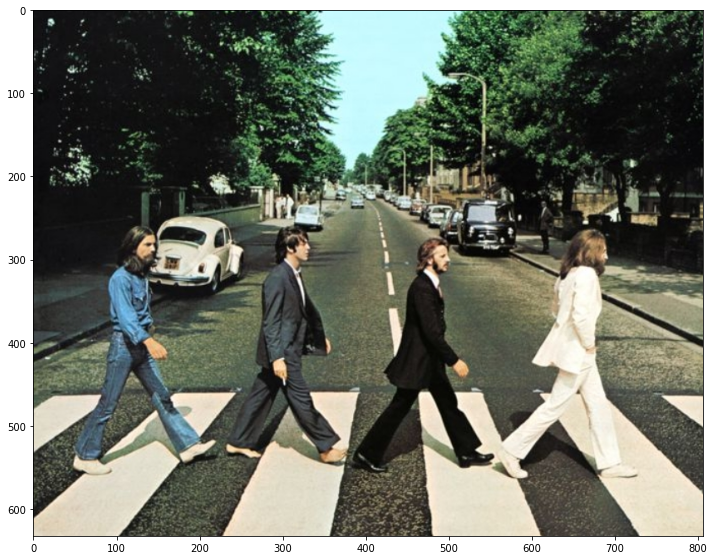

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img.shape)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

### 사전 학습된 모델과 환경 파일 다운로드

OpenCV는 타 프레임워크에서 생성된 모델을 변환하여 로딩 (DNN 패키지)

가중치 모델 파일과 환경(Config) 파일을 입력 인자로 하여 모델을 로딩


<br/>

1. 가중치 모델 파일과 환경 설정 파일을 로드하여 inference 네트워크 생성

- cvNet = cv2.dnn.readNetFromTensorflow('frozen_inference_graph.pb', 'graph.ptxtx)

<br/>

2. 입력 이미지를 Preprocessing하여 네트워크에 입력

- cvNet.setInput(cv2.dnn.blobFromImage(img, size=(300, 300), swapRB=True, crop=False))

- blobFromImage() : 이미지 사이즈 고정, 이미지 값 스케일링, RGB로 변경, crop 옵션을 사용하여 이미지를 Preprocessing

<br/>

3. Inference 네트워크를 통해 출력

- networkOutput = cvNet.forward()

<br/>

4. 추출된 output에서 detect된 정보를 기반으로 결과 시각화

- for detection in networkOutput ~ 시각화 로직
    

In [3]:
!mkdir ./pretrained
!wget -O ./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

--2021-11-10 05:53:12--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.143.128, 2a00:1450:4013:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.143.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

./pretrained/faster 100%[===================>] 363.69M  70.5MB/s    in 5.2s    

2021-11-10 05:53:18 (70.5 MB/s) - ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2021-11-10 05:53:18--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.gi

In [4]:
!tar -xvf ./pretrained/faster*.tar.gz -C ./pretrained 

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


In [5]:
!pwd
!ls -lia ./pretrained/faster_rcnn_resnet50_coco_2018_01_28

/content
total 296076
5505032 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 .
5505029 drwxr-xr-x 3 root   root      4096 Nov 10 05:53 ..
5505034 -rw-r--r-- 1 345018 5000        77 Feb  1  2018 checkpoint
5505041 -rw-r--r-- 1 345018 5000 120549957 Feb  1  2018 frozen_inference_graph.pb
5505036 -rw-r--r-- 1 345018 5000 176914228 Feb  1  2018 model.ckpt.data-00000-of-00001
5505033 -rw-r--r-- 1 345018 5000     14460 Feb  1  2018 model.ckpt.index
5505037 -rw-r--r-- 1 345018 5000   5675175 Feb  1  2018 model.ckpt.meta
5505035 -rw-r--r-- 1 345018 5000      3240 Feb  1  2018 pipeline.config
5505038 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 saved_model


In [6]:
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 
                                     ' ./pretrained/config_graph.pbtxt')

In [7]:
# OpenCV Tensorflow Faster-RCNN용
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

In [8]:
img.shape

(633, 806, 3)

### Inference

(1, 1, 100, 7)
person: 0.9998
person: 0.9996
person: 0.9993
person: 0.9970
person: 0.8995
car: 0.8922
car: 0.7602
car: 0.7415
car: 0.6930
car: 0.6918
car: 0.6896
car: 0.6717
car: 0.6521
car: 0.5730
car: 0.5679
car: 0.5261
car: 0.5012


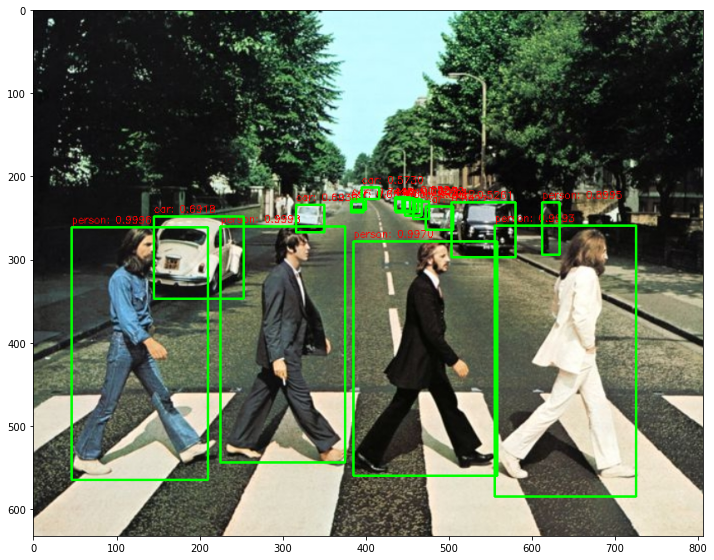

In [13]:
rows = img.shape[0]
cols = img.shape[1]

draw_img = img.copy()  # 시각화 용

# Input
cv_net.setInput(cv2.dnn.blobFromImage(img, swapRB=True, crop=False))  # classification layer가 Dense가 아니기 때문에 size를 고정할 필요 x

# Inference (Object Detection 수행)
cv_out = cv_net.forward()
print(cv_out.shape)  # 100개 object에 대한 정보 (의미 x, label, confidence_score, x, y, w, h )

green_color=(0, 255, 0)
red_color=(0, 0, 255)

for detection in cv_out[0,0,:,:]:
    score = float(detection[2])
    class_id = int(detection[1])
    
    # 검출된 object중 score가 0.5보다 큰 객체들만 추출
    if score > 0.5:
        # scale 기준으로 예측된 좌표들을 원본 이미지 비율에 맞게 변환
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows

        caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)  # 검출한 객체와 confidence score 표시
        print(caption)

        cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

### 단일 이미지에 대한 Object Detection 프로그램

In [15]:
import time

In [16]:
def get_detected_img(cv_net, img_array, score_threshold, use_copied_array=True, is_print=True):
    
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    
    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
    
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, swapRB=True, crop=False))
    
    start = time.time()
    cv_out = cv_net.forward()
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])

        # detected된 object들의 score가 함수 인자로 들어온 score_threshold 이상만 추출
        if score > score_threshold:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows

            caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
            print(caption)

            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)
            
    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")

    return draw_img

image shape: (633, 806, 3)
person: 0.9998
person: 0.9996
person: 0.9993
person: 0.9970
person: 0.8995
car: 0.8922
car: 0.7602
car: 0.7415
car: 0.6930
car: 0.6918
car: 0.6896
car: 0.6717
car: 0.6521
car: 0.5730
car: 0.5679
car: 0.5261
car: 0.5012
Detection 수행시간: 8.59 초


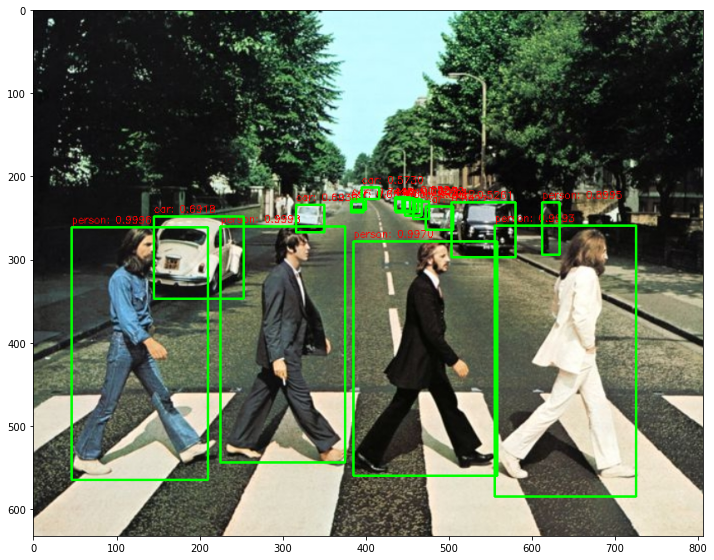

In [17]:
img = cv2.imread('./data/beatles01.jpg')
print('image shape:', img.shape)

# tensorflow inference 모델 로딩
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 
                                       './pretrained/config_graph.pbtxt')

# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net, img, score_threshold=0.5, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

### Video Object Detection

In [ ]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

In [19]:
video_input_path = '/content/data/Jonh_Wick_small.mp4'

cap = cv2.VideoCapture(video_input_path)
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt)

총 Frame 갯수: 58


In [20]:
video_input_path = '/content/data/Jonh_Wick_small.mp4'
video_output_path = './data/John_Wick_small_cv01.mp4'

cap = cv2.VideoCapture(video_input_path)

codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) 
vid_fps = cap.get(cv2.CAP_PROP_FPS )
    
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt)

총 Frame 갯수: 58


In [ ]:
green_color=(0, 255, 0)
red_color=(0, 0, 255)

# 프레임 별로 iteration하면서 프레임 별 단일 이미지에 대한 Object Detection 수행
while True:
    # 프레임 별로 불러오기
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break

    rows = img_frame.shape[0]
    cols = img_frame.shape[1]
    
    # Input frame
    cv_net.setInput(cv2.dnn.blobFromImage(img_frame,  swapRB=True, crop=False))
    
    # Inference & Detection
    start= time.time()
    cv_out = cv_net.forward()
    frame_index = 0

    for detection in cv_out[0, 0, :, :]:
        score = float(detection[2])
        class_id = int(detection[1])

        if score > 0.5:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows 

            caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)

            cv2.rectangle(img_frame, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(img_frame, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)

        print('Detection 수행 시간:', round(time.time()-start, 2),'초')
    vid_writer.write(img_frame)

vid_writer.release()
cap.release()  

In [ ]:
def do_detected_video(cv_net, input_path, output_path, score_threshold, is_print):
    
    # 입력 영상
    cap = cv2.VideoCapture(input_path)
    
    # 출력 영상 설정
    codec = cv2.VideoWriter_fourcc(*'XVID')
    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    # 입력 영상의 매 프레임을 불러오며 object detection 수행
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        # 단일 이미지 프레임에 대한 object detection (img_frame = img_array)
        img_frame = get_detected_img(cv_net, img_frame, score_threshold=score_threshold, use_copied_array=False, is_print=is_print)
        
        vid_writer.write(img_frame)

    vid_writer.release()
    cap.release()

In [ ]:
do_detected_video(cv_net, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_02.mp4', 0.2, False)